In [ ]:
!pip install torch torchvision torchaudio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 116.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 94.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 62.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 106.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitl

In [ ]:
!pip install matplotlib numpy

In [ ]:
!python --version

Python 3.11.13


In [ ]:
import torch
torch.__version__

'2.6.0+cu124'

In [ ]:
torch.cuda.get_device_name(0)

'Tesla T4'

In [11]:
!pip install kaggle

In [18]:
import os
from google.colab import userdata

# Set up Kaggle API credentials
os.environ['KAGGLE_USERNAME'] = userdata.get('KAGGLE_USERNAME')
os.environ['KAGGLE_KEY'] = userdata.get('KAGGLE_KEY')

In [19]:
!kaggle datasets download -d jessicali9530/celeba-dataset

Dataset URL: https://www.kaggle.com/datasets/jessicali9530/celeba-dataset
License(s): other
 99% 1.32G/1.33G [00:22<00:00, 202MB/s]
100% 1.33G/1.33G [00:22<00:00, 64.2MB/s]


In [20]:
!unzip celeba-dataset.zip -d celeba-dataset

Streaming output truncated to the last 5000 lines.
  inflating: celeba-dataset/img_align_celeba/img_align_celeba/197605.jpg  
  inflating: celeba-dataset/img_align_celeba/img_align_celeba/197606.jpg  
  inflating: celeba-dataset/img_align_celeba/img_align_celeba/197607.jpg  
  inflating: celeba-dataset/img_align_celeba/img_align_celeba/197608.jpg  
  inflating: celeba-dataset/img_align_celeba/img_align_celeba/197609.jpg  
  inflating: celeba-dataset/img_align_celeba/img_align_celeba/197610.jpg  
  inflating: celeba-dataset/img_align_celeba/img_align_celeba/197611.jpg  
  inflating: celeba-dataset/img_align_celeba/img_align_celeba/197612.jpg  
  inflating: celeba-dataset/img_align_celeba/img_align_celeba/197613.jpg  
  inflating: celeba-dataset/img_align_celeba/img_align_celeba/197614.jpg  
  inflating: celeba-dataset/img_align_celeba/img_align_celeba/197615.jpg  
  inflating: celeba-dataset/img_align_celeba/img_align_celeba/197616.jpg  
  inflating: celeba-dataset/img_align_celeba/img_

In [21]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import os

class CelebADataset(Dataset):
    def __init__(self, root_dir, transform=None):
        """
        Args:
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied on a sample.
        """
        self.root_dir = root_dir
        self.transform = transform

        # Get all image file paths from the directory
        self.image_paths = [os.path.join(root_dir, img) for img in os.listdir(root_dir) if img.endswith('.jpg')]

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        # Load image
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert('RGB')

        # Apply the transform if provided
        if self.transform:
            image = self.transform(image)

        return image

In [23]:
# Define transformations (resize, crop, convert to tensor, normalize)
transform = transforms.Compose([
    transforms.Resize(64),  # Resize images to 64x64
    transforms.CenterCrop(64),  # Crop center to 64x64
    transforms.ToTensor(),  # Convert images to tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize to [-1, 1]
])

# Load CelebA dataset from the specified directory
dataset_path = '/content/celeba-dataset/img_align_celeba/img_align_celeba'
dataset = CelebADataset(root_dir=dataset_path, transform=transform)

# Create DataLoader
dataloader = DataLoader(dataset, batch_size=128, shuffle=True)

# Check how many images are loaded
print(f"Total number of images loaded: {len(dataset)}")

Total number of images loaded: 202599


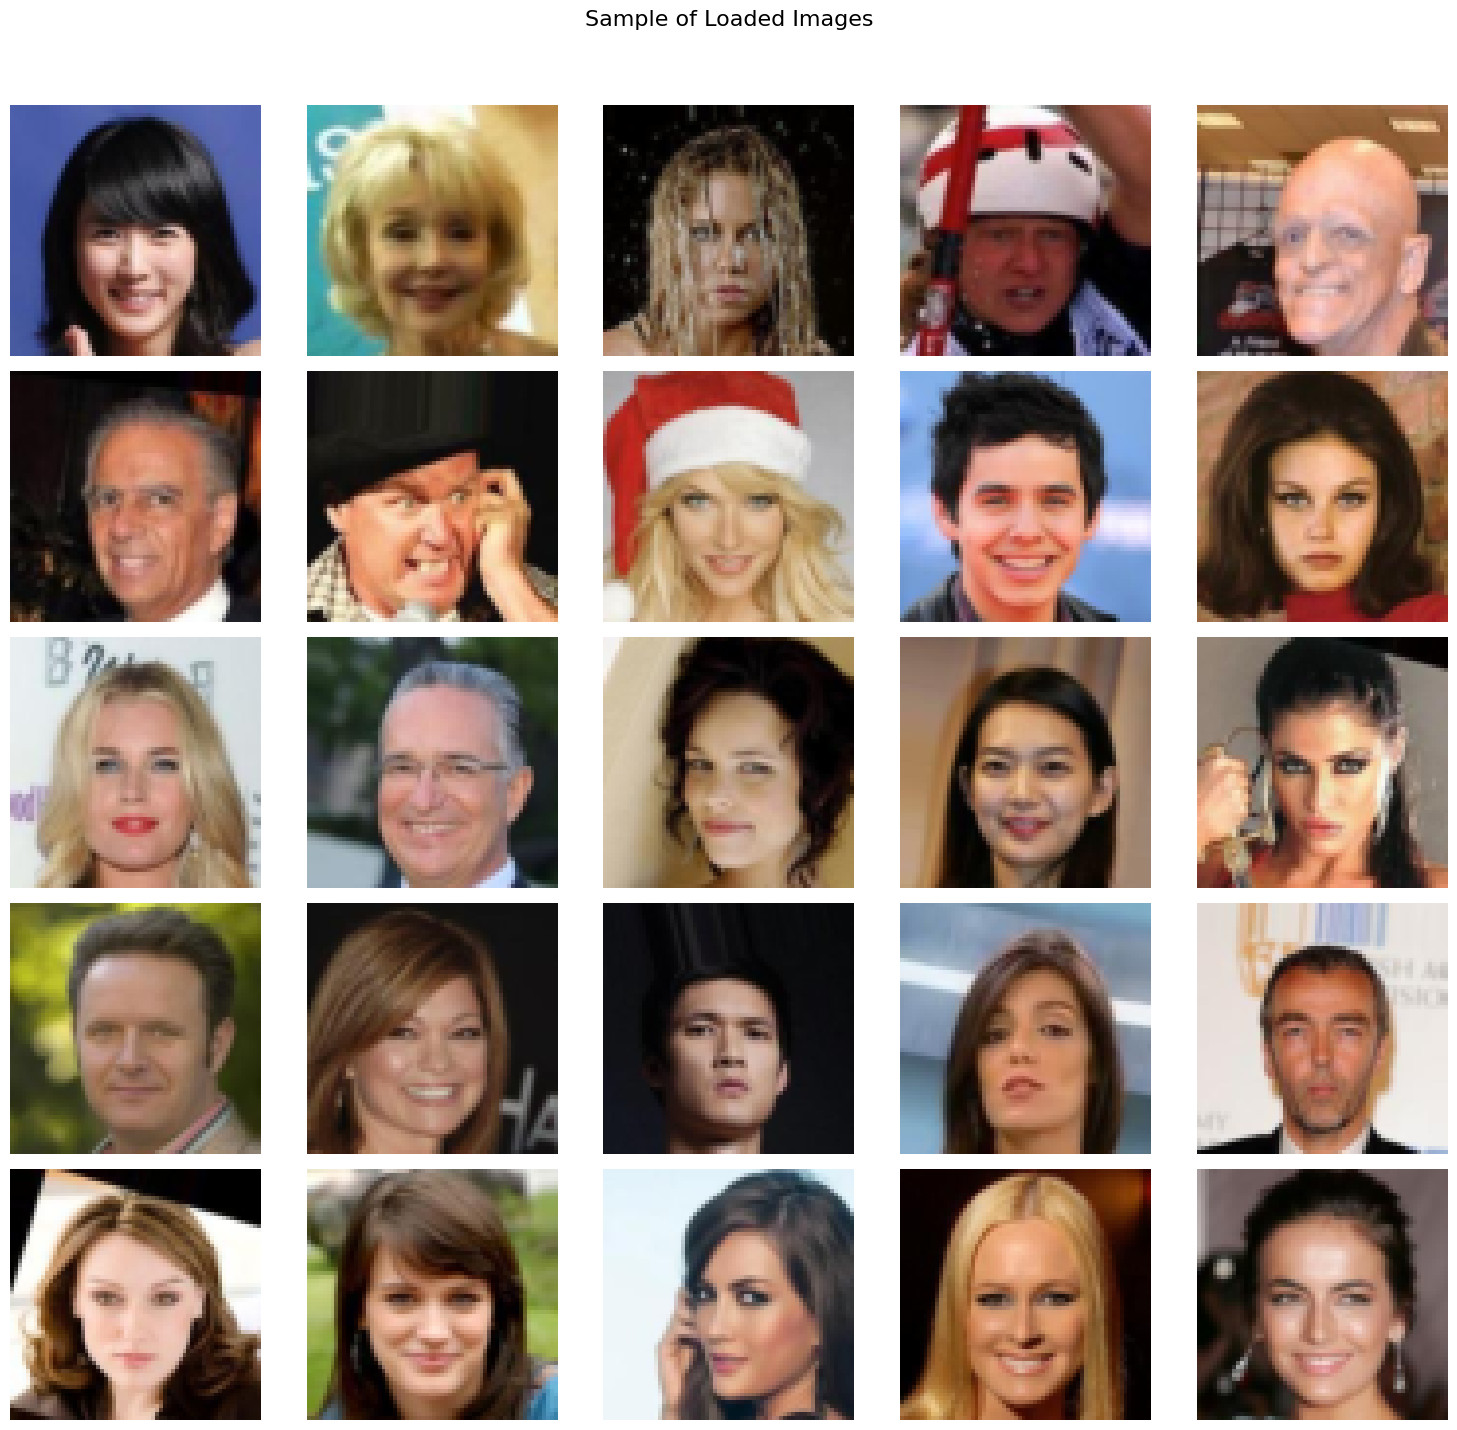

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Get a batch of images from the dataloader
# We'll get the first batch and display images from it
dataiter = iter(dataloader)
images = next(dataiter)

# Unnormalize the images for displaying
# The images are normalized to [-1, 1], so we convert them back to [0, 1]
images = images / 2 + 0.5

# Display the images in a grid
num_images_to_display = 25
n_cols = 5
n_rows = (num_images_to_display + n_cols - 1) // n_cols

plt.figure(figsize=(15, n_rows * 3))
for i in range(min(num_images_to_display, images.shape[0])):
    plt.subplot(n_rows, n_cols, i + 1)
    # Transpose the image tensor from (C, H, W) to (H, W, C) for displaying with matplotlib
    plt.imshow(np.transpose(images[i], (1, 2, 0)))
    plt.axis('off')

plt.suptitle("Sample of Loaded Images", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

[Epoch 0/50] [Batch 0/1583] [D loss: 0.6916853189468384] [G loss: 0.6915205121040344]
[Epoch 0/50] [Batch 50/1583] [D loss: 0.26477205753326416] [G loss: 0.9946863651275635]
[Epoch 0/50] [Batch 100/1583] [D loss: 0.38095125555992126] [G loss: 0.8108425736427307]
[Epoch 0/50] [Batch 150/1583] [D loss: 0.12618659436702728] [G loss: 1.7371805906295776]
[Epoch 0/50] [Batch 200/1583] [D loss: 0.143167182803154] [G loss: 2.0222699642181396]
[Epoch 0/50] [Batch 250/1583] [D loss: 0.1844872236251831] [G loss: 1.9190956354141235]
[Epoch 0/50] [Batch 300/1583] [D loss: 0.1499282717704773] [G loss: 2.541663646697998]
[Epoch 0/50] [Batch 350/1583] [D loss: 0.10654745250940323] [G loss: 2.702770471572876]
[Epoch 0/50] [Batch 400/1583] [D loss: 0.09078682214021683] [G loss: 2.1115293502807617]
[Epoch 0/50] [Batch 450/1583] [D loss: 0.1426316499710083] [G loss: 3.002842426300049]
[Epoch 0/50] [Batch 500/1583] [D loss: 0.20671100914478302] [G loss: 1.6843006610870361]
[Epoch 0/50] [Batch 550/1583] [D 

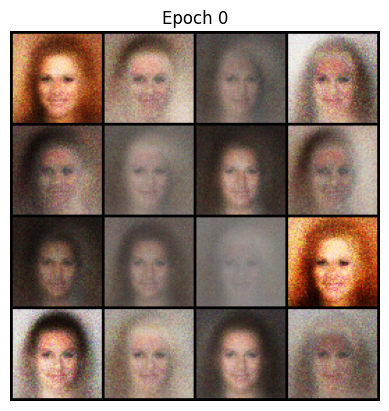

[Epoch 1/50] [Batch 0/1583] [D loss: 0.3663042187690735] [G loss: 2.6018292903900146]
[Epoch 1/50] [Batch 50/1583] [D loss: 0.31892794370651245] [G loss: 2.0399231910705566]
[Epoch 1/50] [Batch 100/1583] [D loss: 0.2961794137954712] [G loss: 1.8223721981048584]
[Epoch 1/50] [Batch 150/1583] [D loss: 0.41840529441833496] [G loss: 2.4505791664123535]
[Epoch 1/50] [Batch 200/1583] [D loss: 0.44135165214538574] [G loss: 2.997446298599243]
[Epoch 1/50] [Batch 250/1583] [D loss: 0.35741135478019714] [G loss: 2.2997775077819824]
[Epoch 1/50] [Batch 300/1583] [D loss: 0.4155302047729492] [G loss: 1.9416083097457886]
[Epoch 1/50] [Batch 350/1583] [D loss: 0.39733263850212097] [G loss: 1.6930787563323975]
[Epoch 1/50] [Batch 400/1583] [D loss: 0.35636967420578003] [G loss: 2.0254716873168945]
[Epoch 1/50] [Batch 450/1583] [D loss: 0.28750091791152954] [G loss: 2.4113807678222656]
[Epoch 1/50] [Batch 500/1583] [D loss: 0.4573473036289215] [G loss: 1.9734280109405518]
[Epoch 1/50] [Batch 550/1583]

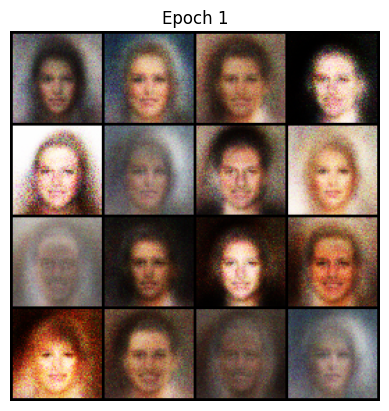

[Epoch 2/50] [Batch 0/1583] [D loss: 0.35533207654953003] [G loss: 2.39440655708313]
[Epoch 2/50] [Batch 50/1583] [D loss: 0.3076571822166443] [G loss: 2.0662057399749756]
[Epoch 2/50] [Batch 100/1583] [D loss: 0.548908531665802] [G loss: 1.8121814727783203]
[Epoch 2/50] [Batch 150/1583] [D loss: 0.4516727924346924] [G loss: 2.5890116691589355]
[Epoch 2/50] [Batch 200/1583] [D loss: 0.47265729308128357] [G loss: 1.579333782196045]
[Epoch 2/50] [Batch 250/1583] [D loss: 0.3038313686847687] [G loss: 2.0802719593048096]
[Epoch 2/50] [Batch 300/1583] [D loss: 0.649340808391571] [G loss: 1.7036479711532593]
[Epoch 2/50] [Batch 350/1583] [D loss: 0.3264530897140503] [G loss: 2.594109058380127]
[Epoch 2/50] [Batch 400/1583] [D loss: 0.5021079778671265] [G loss: 1.7084184885025024]
[Epoch 2/50] [Batch 450/1583] [D loss: 0.522406816482544] [G loss: 1.806440830230713]
[Epoch 2/50] [Batch 500/1583] [D loss: 0.43967682123184204] [G loss: 1.9456357955932617]
[Epoch 2/50] [Batch 550/1583] [D loss: 0

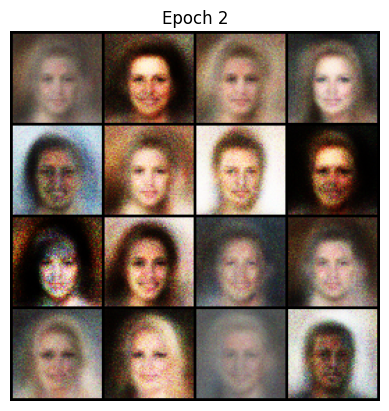

[Epoch 3/50] [Batch 0/1583] [D loss: 0.5152283906936646] [G loss: 1.5168006420135498]
[Epoch 3/50] [Batch 50/1583] [D loss: 0.44688183069229126] [G loss: 1.9151592254638672]
[Epoch 3/50] [Batch 100/1583] [D loss: 0.5414893627166748] [G loss: 2.077145576477051]
[Epoch 3/50] [Batch 150/1583] [D loss: 0.4892941117286682] [G loss: 1.8693214654922485]
[Epoch 3/50] [Batch 200/1583] [D loss: 0.4771591126918793] [G loss: 1.609708547592163]
[Epoch 3/50] [Batch 250/1583] [D loss: 0.46020185947418213] [G loss: 1.3861883878707886]
[Epoch 3/50] [Batch 300/1583] [D loss: 0.6479976773262024] [G loss: 1.6415400505065918]
[Epoch 3/50] [Batch 350/1583] [D loss: 0.5337175130844116] [G loss: 1.4829390048980713]
[Epoch 3/50] [Batch 400/1583] [D loss: 0.4803861975669861] [G loss: 1.3729469776153564]
[Epoch 3/50] [Batch 450/1583] [D loss: 0.474967896938324] [G loss: 1.620201826095581]
[Epoch 3/50] [Batch 500/1583] [D loss: 0.5022574663162231] [G loss: 1.739514946937561]
[Epoch 3/50] [Batch 550/1583] [D loss:

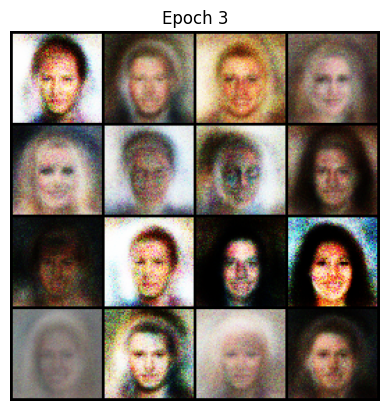

[Epoch 4/50] [Batch 0/1583] [D loss: 0.514542281627655] [G loss: 1.045759916305542]
[Epoch 4/50] [Batch 50/1583] [D loss: 0.5755799412727356] [G loss: 1.2742383480072021]
[Epoch 4/50] [Batch 100/1583] [D loss: 0.46529459953308105] [G loss: 1.2881503105163574]
[Epoch 4/50] [Batch 150/1583] [D loss: 0.49975308775901794] [G loss: 1.3322291374206543]
[Epoch 4/50] [Batch 200/1583] [D loss: 0.5356422662734985] [G loss: 1.465336799621582]
[Epoch 4/50] [Batch 250/1583] [D loss: 0.4457211494445801] [G loss: 1.4287431240081787]
[Epoch 4/50] [Batch 300/1583] [D loss: 0.5331181883811951] [G loss: 1.638429880142212]
[Epoch 4/50] [Batch 350/1583] [D loss: 0.5253017544746399] [G loss: 1.3356730937957764]
[Epoch 4/50] [Batch 400/1583] [D loss: 0.519677996635437] [G loss: 1.4006403684616089]
[Epoch 4/50] [Batch 450/1583] [D loss: 0.49624136090278625] [G loss: 1.5277035236358643]
[Epoch 4/50] [Batch 500/1583] [D loss: 0.4660817086696625] [G loss: 1.779154658317566]
[Epoch 4/50] [Batch 550/1583] [D loss:

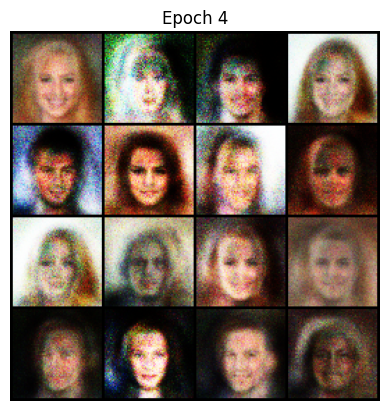

[Epoch 5/50] [Batch 0/1583] [D loss: 0.5763454437255859] [G loss: 1.2335762977600098]
[Epoch 5/50] [Batch 50/1583] [D loss: 0.6031394004821777] [G loss: 1.4857369661331177]
[Epoch 5/50] [Batch 100/1583] [D loss: 0.5368523001670837] [G loss: 1.3596258163452148]
[Epoch 5/50] [Batch 150/1583] [D loss: 0.5752814412117004] [G loss: 1.3327702283859253]
[Epoch 5/50] [Batch 200/1583] [D loss: 0.605186402797699] [G loss: 1.3014053106307983]
[Epoch 5/50] [Batch 250/1583] [D loss: 0.5459845066070557] [G loss: 1.4392566680908203]
[Epoch 5/50] [Batch 300/1583] [D loss: 0.5346875190734863] [G loss: 1.2035263776779175]
[Epoch 5/50] [Batch 350/1583] [D loss: 0.557813823223114] [G loss: 1.3851381540298462]
[Epoch 5/50] [Batch 400/1583] [D loss: 0.5252099633216858] [G loss: 1.3005026578903198]
[Epoch 5/50] [Batch 450/1583] [D loss: 0.5647374391555786] [G loss: 1.4393051862716675]
[Epoch 5/50] [Batch 500/1583] [D loss: 0.5986452102661133] [G loss: 1.1738207340240479]
[Epoch 5/50] [Batch 550/1583] [D loss

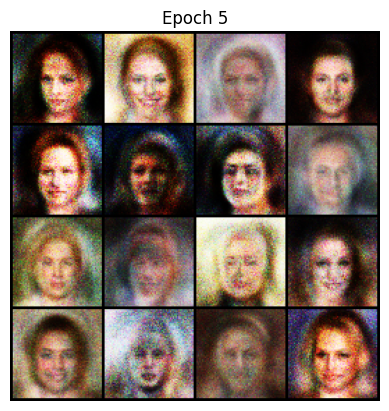

[Epoch 6/50] [Batch 0/1583] [D loss: 0.5847939848899841] [G loss: 1.0747489929199219]
[Epoch 6/50] [Batch 50/1583] [D loss: 0.637837290763855] [G loss: 1.1716835498809814]
[Epoch 6/50] [Batch 100/1583] [D loss: 0.5584081411361694] [G loss: 1.2777621746063232]
[Epoch 6/50] [Batch 150/1583] [D loss: 0.5788899064064026] [G loss: 1.2682911157608032]
[Epoch 6/50] [Batch 200/1583] [D loss: 0.5743659734725952] [G loss: 1.4816632270812988]
[Epoch 6/50] [Batch 250/1583] [D loss: 0.5279085040092468] [G loss: 1.2387129068374634]
[Epoch 6/50] [Batch 300/1583] [D loss: 0.6111000776290894] [G loss: 1.452040195465088]
[Epoch 6/50] [Batch 350/1583] [D loss: 0.5765816569328308] [G loss: 1.0490856170654297]
[Epoch 6/50] [Batch 400/1583] [D loss: 0.5783991813659668] [G loss: 1.4731111526489258]
[Epoch 6/50] [Batch 450/1583] [D loss: 0.612086296081543] [G loss: 1.2268409729003906]
[Epoch 6/50] [Batch 500/1583] [D loss: 0.600572943687439] [G loss: 1.2384753227233887]
[Epoch 6/50] [Batch 550/1583] [D loss: 

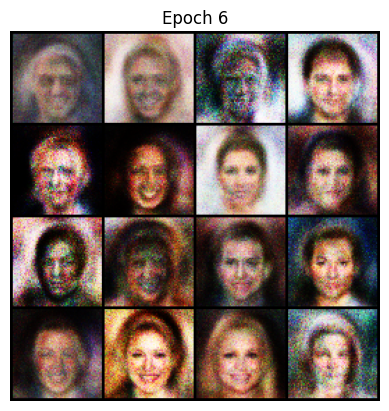

[Epoch 7/50] [Batch 0/1583] [D loss: 0.6250484585762024] [G loss: 1.1305677890777588]
[Epoch 7/50] [Batch 50/1583] [D loss: 0.5913426876068115] [G loss: 1.2821524143218994]
[Epoch 7/50] [Batch 100/1583] [D loss: 0.5148805379867554] [G loss: 1.1463617086410522]
[Epoch 7/50] [Batch 150/1583] [D loss: 0.579223096370697] [G loss: 1.1437358856201172]
[Epoch 7/50] [Batch 200/1583] [D loss: 0.6044003963470459] [G loss: 1.1652092933654785]
[Epoch 7/50] [Batch 250/1583] [D loss: 0.5693870782852173] [G loss: 1.1876356601715088]
[Epoch 7/50] [Batch 300/1583] [D loss: 0.5956577062606812] [G loss: 1.3014155626296997]
[Epoch 7/50] [Batch 350/1583] [D loss: 0.5679299235343933] [G loss: 1.3812615871429443]
[Epoch 7/50] [Batch 400/1583] [D loss: 0.5210575461387634] [G loss: 1.0311644077301025]
[Epoch 7/50] [Batch 450/1583] [D loss: 0.5743299722671509] [G loss: 1.0898487567901611]
[Epoch 7/50] [Batch 500/1583] [D loss: 0.6117289066314697] [G loss: 1.024899959564209]
[Epoch 7/50] [Batch 550/1583] [D loss

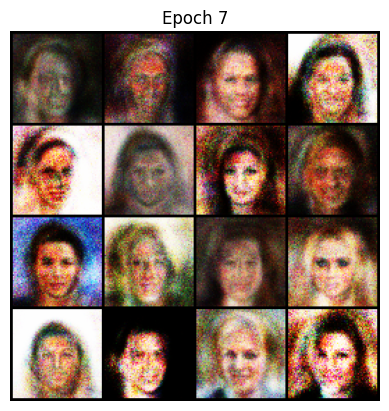

[Epoch 8/50] [Batch 0/1583] [D loss: 0.5862388610839844] [G loss: 0.9639947414398193]
[Epoch 8/50] [Batch 50/1583] [D loss: 0.5532666444778442] [G loss: 1.1444894075393677]
[Epoch 8/50] [Batch 100/1583] [D loss: 0.6253002882003784] [G loss: 1.2651121616363525]
[Epoch 8/50] [Batch 150/1583] [D loss: 0.6321626305580139] [G loss: 1.004547357559204]
[Epoch 8/50] [Batch 200/1583] [D loss: 0.6334344148635864] [G loss: 0.998532772064209]
[Epoch 8/50] [Batch 250/1583] [D loss: 0.5538684725761414] [G loss: 1.1392799615859985]
[Epoch 8/50] [Batch 300/1583] [D loss: 0.6458660960197449] [G loss: 1.0612378120422363]
[Epoch 8/50] [Batch 350/1583] [D loss: 0.6088148355484009] [G loss: 1.146884560585022]
[Epoch 8/50] [Batch 400/1583] [D loss: 0.5929518938064575] [G loss: 1.126692295074463]
[Epoch 8/50] [Batch 450/1583] [D loss: 0.6259371042251587] [G loss: 1.1182663440704346]
[Epoch 8/50] [Batch 500/1583] [D loss: 0.5764873623847961] [G loss: 1.0204914808273315]
[Epoch 8/50] [Batch 550/1583] [D loss: 

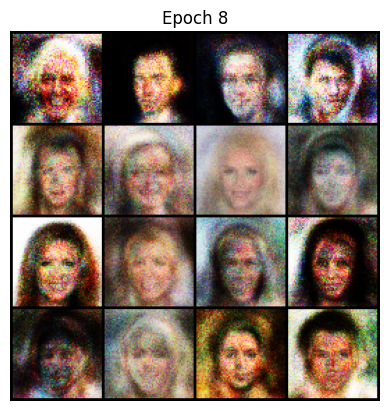

[Epoch 9/50] [Batch 0/1583] [D loss: 0.5753461122512817] [G loss: 0.93938148021698]
[Epoch 9/50] [Batch 50/1583] [D loss: 0.6447420120239258] [G loss: 0.932060956954956]
[Epoch 9/50] [Batch 100/1583] [D loss: 0.6188050508499146] [G loss: 1.0751861333847046]
[Epoch 9/50] [Batch 150/1583] [D loss: 0.6028363704681396] [G loss: 1.017061710357666]
[Epoch 9/50] [Batch 200/1583] [D loss: 0.6206070184707642] [G loss: 0.9664348363876343]
[Epoch 9/50] [Batch 250/1583] [D loss: 0.6667335033416748] [G loss: 1.0647099018096924]
[Epoch 9/50] [Batch 300/1583] [D loss: 0.6530408263206482] [G loss: 1.0411641597747803]
[Epoch 9/50] [Batch 350/1583] [D loss: 0.6295508146286011] [G loss: 0.9391301870346069]
[Epoch 9/50] [Batch 400/1583] [D loss: 0.6369031071662903] [G loss: 1.1121597290039062]
[Epoch 9/50] [Batch 450/1583] [D loss: 0.601302444934845] [G loss: 1.1490353345870972]
[Epoch 9/50] [Batch 500/1583] [D loss: 0.6278477907180786] [G loss: 1.0309416055679321]
[Epoch 9/50] [Batch 550/1583] [D loss: 0

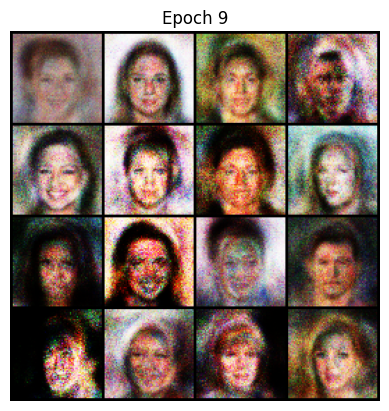

[Epoch 10/50] [Batch 0/1583] [D loss: 0.6446649432182312] [G loss: 1.023911714553833]
[Epoch 10/50] [Batch 50/1583] [D loss: 0.6170730590820312] [G loss: 0.9395471811294556]
[Epoch 10/50] [Batch 100/1583] [D loss: 0.5903664827346802] [G loss: 0.9879962205886841]
[Epoch 10/50] [Batch 150/1583] [D loss: 0.6086537837982178] [G loss: 1.071211814880371]
[Epoch 10/50] [Batch 200/1583] [D loss: 0.6039370894432068] [G loss: 0.9280312061309814]
[Epoch 10/50] [Batch 250/1583] [D loss: 0.5717037916183472] [G loss: 1.0122162103652954]
[Epoch 10/50] [Batch 300/1583] [D loss: 0.5911373496055603] [G loss: 0.9038182497024536]
[Epoch 10/50] [Batch 350/1583] [D loss: 0.6178733110427856] [G loss: 1.0898613929748535]
[Epoch 10/50] [Batch 400/1583] [D loss: 0.6153595447540283] [G loss: 1.010166883468628]
[Epoch 10/50] [Batch 450/1583] [D loss: 0.5791254043579102] [G loss: 1.0975747108459473]
[Epoch 10/50] [Batch 500/1583] [D loss: 0.6635457873344421] [G loss: 1.0561909675598145]
[Epoch 10/50] [Batch 550/15

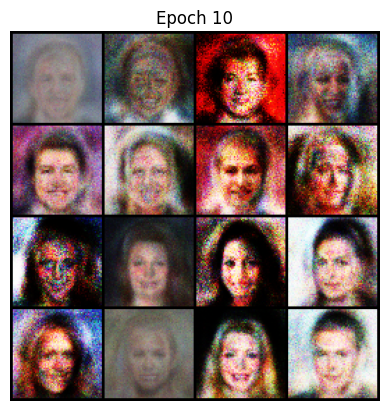

[Epoch 11/50] [Batch 0/1583] [D loss: 0.6059677600860596] [G loss: 1.028240442276001]
[Epoch 11/50] [Batch 50/1583] [D loss: 0.6607557535171509] [G loss: 0.9208661913871765]
[Epoch 11/50] [Batch 100/1583] [D loss: 0.6416019201278687] [G loss: 0.9158103466033936]
[Epoch 11/50] [Batch 150/1583] [D loss: 0.6484450697898865] [G loss: 1.051011085510254]
[Epoch 11/50] [Batch 200/1583] [D loss: 0.6104429960250854] [G loss: 0.9754626750946045]
[Epoch 11/50] [Batch 250/1583] [D loss: 0.6387083530426025] [G loss: 0.9935454726219177]
[Epoch 11/50] [Batch 300/1583] [D loss: 0.5862897634506226] [G loss: 1.0223790407180786]
[Epoch 11/50] [Batch 350/1583] [D loss: 0.583699107170105] [G loss: 1.0042634010314941]
[Epoch 11/50] [Batch 400/1583] [D loss: 0.57908695936203] [G loss: 0.9455164670944214]
[Epoch 11/50] [Batch 450/1583] [D loss: 0.5990160703659058] [G loss: 0.9443090558052063]
[Epoch 11/50] [Batch 500/1583] [D loss: 0.6205610036849976] [G loss: 1.0501658916473389]
[Epoch 11/50] [Batch 550/1583

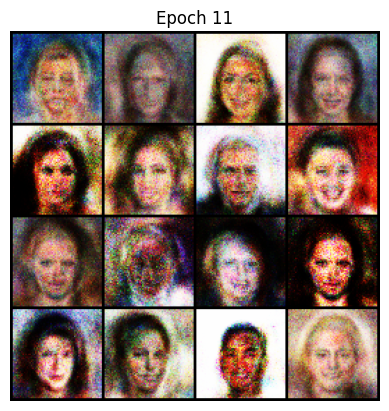

[Epoch 12/50] [Batch 0/1583] [D loss: 0.5984892845153809] [G loss: 0.9027528762817383]
[Epoch 12/50] [Batch 50/1583] [D loss: 0.6203105449676514] [G loss: 0.9975433349609375]
[Epoch 12/50] [Batch 100/1583] [D loss: 0.6506951451301575] [G loss: 1.1296045780181885]
[Epoch 12/50] [Batch 150/1583] [D loss: 0.6042243242263794] [G loss: 0.9633817672729492]
[Epoch 12/50] [Batch 200/1583] [D loss: 0.6076842546463013] [G loss: 0.9187341928482056]
[Epoch 12/50] [Batch 250/1583] [D loss: 0.5683249235153198] [G loss: 0.9847926497459412]
[Epoch 12/50] [Batch 300/1583] [D loss: 0.6229738593101501] [G loss: 0.9394518136978149]
[Epoch 12/50] [Batch 350/1583] [D loss: 0.6197394132614136] [G loss: 1.0126328468322754]
[Epoch 12/50] [Batch 400/1583] [D loss: 0.6477890014648438] [G loss: 1.0914804935455322]
[Epoch 12/50] [Batch 450/1583] [D loss: 0.5852134227752686] [G loss: 1.062268614768982]
[Epoch 12/50] [Batch 500/1583] [D loss: 0.6217761039733887] [G loss: 0.9213067293167114]
[Epoch 12/50] [Batch 550/

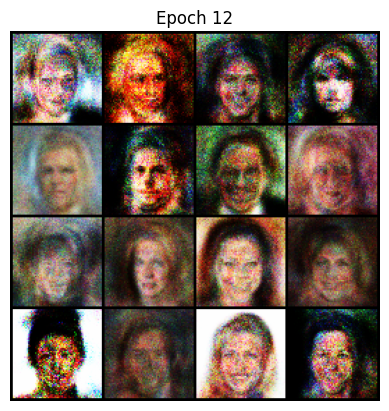

[Epoch 13/50] [Batch 0/1583] [D loss: 0.6335100531578064] [G loss: 1.0887410640716553]
[Epoch 13/50] [Batch 50/1583] [D loss: 0.6478995084762573] [G loss: 1.0295928716659546]
[Epoch 13/50] [Batch 100/1583] [D loss: 0.664867639541626] [G loss: 0.8616164922714233]
[Epoch 13/50] [Batch 150/1583] [D loss: 0.6598272323608398] [G loss: 1.1090885400772095]
[Epoch 13/50] [Batch 200/1583] [D loss: 0.6099646091461182] [G loss: 1.021830439567566]
[Epoch 13/50] [Batch 250/1583] [D loss: 0.6452503800392151] [G loss: 1.0204261541366577]
[Epoch 13/50] [Batch 300/1583] [D loss: 0.6348798274993896] [G loss: 1.01749587059021]
[Epoch 13/50] [Batch 350/1583] [D loss: 0.6361157894134521] [G loss: 0.960618257522583]
[Epoch 13/50] [Batch 400/1583] [D loss: 0.609778642654419] [G loss: 0.9902393817901611]
[Epoch 13/50] [Batch 450/1583] [D loss: 0.6594876050949097] [G loss: 0.8765605688095093]
[Epoch 13/50] [Batch 500/1583] [D loss: 0.6319646239280701] [G loss: 0.9277611970901489]
[Epoch 13/50] [Batch 550/1583]

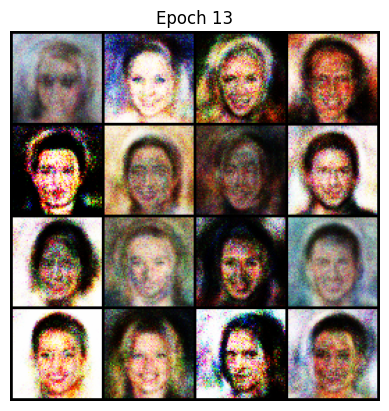

[Epoch 14/50] [Batch 0/1583] [D loss: 0.6622315645217896] [G loss: 1.0879696607589722]
[Epoch 14/50] [Batch 50/1583] [D loss: 0.6004557609558105] [G loss: 1.0761139392852783]
[Epoch 14/50] [Batch 100/1583] [D loss: 0.597527265548706] [G loss: 1.0468766689300537]
[Epoch 14/50] [Batch 150/1583] [D loss: 0.62678462266922] [G loss: 0.8334189653396606]
[Epoch 14/50] [Batch 200/1583] [D loss: 0.6475623250007629] [G loss: 1.0549416542053223]
[Epoch 14/50] [Batch 250/1583] [D loss: 0.6249516606330872] [G loss: 1.0348635911941528]
[Epoch 14/50] [Batch 300/1583] [D loss: 0.6402024626731873] [G loss: 0.9482359290122986]
[Epoch 14/50] [Batch 350/1583] [D loss: 0.569909930229187] [G loss: 1.0427182912826538]
[Epoch 14/50] [Batch 400/1583] [D loss: 0.5929125547409058] [G loss: 1.0504999160766602]
[Epoch 14/50] [Batch 450/1583] [D loss: 0.6179046034812927] [G loss: 0.8954727649688721]
[Epoch 14/50] [Batch 500/1583] [D loss: 0.6294148564338684] [G loss: 0.9991471171379089]
[Epoch 14/50] [Batch 550/158

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms
import matplotlib.pyplot as plt
import os
from PIL import Image
import torchvision
import numpy as np


# Generator and Discriminator classes
class Generator(nn.Module):
    def __init__(self, z_dim=100, img_channels=3):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(z_dim, 256),
            nn.ReLU(True),
            nn.Linear(256, 512),
            nn.ReLU(True),
            nn.Linear(512, 1024),
            nn.ReLU(True),
            nn.Linear(1024, img_channels * 64 * 64),
            nn.Tanh()
        )

    def forward(self, z):
        img = self.model(z)
        img = img.view(img.size(0), 3, 64, 64)  # Reshape to image format
        return img

class Discriminator(nn.Module):
    def __init__(self, img_channels=3):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(img_channels * 64 * 64, 1024),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, img):
        return self.model(img)

# Loss function and optimizers
adversarial_loss = nn.BCELoss()
generator = Generator(z_dim=100)
discriminator = Discriminator()
optimizer_G = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))

# Define device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
generator = generator.to(device)
discriminator = discriminator.to(device)

# Training loop
def train(generator, discriminator, dataloader, epochs=5):
    for epoch in range(epochs):
        for i, imgs in enumerate(dataloader):
            real_imgs = imgs.to(device)
            batch_size = real_imgs.size(0)
            valid = torch.ones(batch_size, 1).to(device)
            fake = torch.zeros(batch_size, 1).to(device)

            # Train Discriminator
            optimizer_D.zero_grad()
            real_loss = adversarial_loss(discriminator(real_imgs), valid)
            fake_loss = adversarial_loss(discriminator(generator(torch.randn(batch_size, 100).to(device)).detach()), fake)
            d_loss = (real_loss + fake_loss) / 2
            d_loss.backward()
            optimizer_D.step()

            # Train Generator
            optimizer_G.zero_grad()
            g_loss = adversarial_loss(discriminator(generator(torch.randn(batch_size, 100).to(device))), valid)
            g_loss.backward()
            optimizer_G.step()

            if i % 50 == 0:
                print(f"[Epoch {epoch}/{epochs}] [Batch {i}/{len(dataloader)}] [D loss: {d_loss.item()}] [G loss: {g_loss.item()}]")

        # Save generated images at each epoch
        save_generated_images(generator, epoch, device)

def save_generated_images(generator, epoch, device, num_images=16):
    z = torch.randn(num_images, 100).to(device)
    generated_imgs = generator(z).detach().cpu()
    grid = torchvision.utils.make_grid(generated_imgs, nrow=4, normalize=True)
    plt.imshow(np.transpose(grid, (1, 2, 0)))
    plt.title(f"Epoch {epoch}")
    plt.axis('off')
    plt.show()

# Call training function
train(generator, discriminator, dataloader, epochs=50)